#week12

##Sparsity

This week will cover recent results in the field of Sparsity. The problem can be resolving an undetermined system of equations. The applications are many. We'll discuss formulation and conclusions. We will define $l_0,l_1,l_2$ Norms. We will see $l_0, l_1$ Norms, which are the ones that promote Sparsity. With $l_0$, we talk about Matchinbg Pursuit. With $l_1$, we'll see Smooth Reformulations.

What is Sparsity? A vector is sparse if it has only a few non-zero components. The vector can represent an image, that can be sparse in the spatial or the frequency domain.
The applications are Image and Video Processing, Machine Learning, Statistics, Genetics, Econometrics, NeuroScience,...

Say we have $A$ the Genotype Metrix which contains all the information of the patient and Trait Level. Each cell is called alleles. $A$ is very big, and there are just a few alleles which let us understand how the correlation person-locus works. This is a Sparse Matrix. In $b=Ax$, the $x$ vector (solution) is sparse, by constraint. Other examples, with Robust Regression (Least Absolute Deviations), Econometrics (GDP of a Nation and various factors of a Nation), Recommender Systems. 

In this last example of the Recommender System we have a Matrix with Persons and Movies. Of course the Matrix will be sparse, and the Retailer would like to complete this Matrix (~1e6 people, ~1e3 movies). We need additional information: we say that similar people like similar movies. This matrix Completion leads to Rank Minimization problem, because there are just a few similar problems. A low rank Matrix has a number of zero singular values, therefore the vector is sparse.

Image Denoising is also a very common problem. We can transform the image into different domains and just a few Transforms, like DCT, do the job. We consider a patch $y_i$ in the image, so that $y_i=Ax_i$, with $A$ being the dictionary, i.e. the base of DCT transform (fixed dictionary) or it could be an overcomplete Matrix (overcomplete dictionary). In any case, $x_i$ here is Sparse, because only a few coefficients of this transform are needed to provide a good representation of this patch $y_i$! We can obtain a solution of this problem by minimizing:

$$
\min_{x_i} ( |y_i-Ax_i|_2^2 + \lambda |x_i|_1 )
$$

$l_1$ Norm promotes Sparsity. Since Noise is not sparse in the Transform domain, by solving this problem, we are going to reconstruct our Patch. We also mentioned Image Inpainting in the past, as it is a Recovery problem, and there are many techniques to recover this lost information. We also want to utilise Sparsity technique, as in Denoising. We will therefore use $y_i=RAx_i$, where $R$ is a Mask that takes the non-zero values only. We will obtain $x_i^*=arg \min_{x_i}( |y_i-RAx_i|_2^2 + \lambda |x_i|_1)$, and we can utilise $Ax_i^*$ to find the result.

Same story as with Image Super-Resolution. Say we have a set of low and corresponding high resolution images, that we train simultaneously. With a patch $y_{LR}$, we can have $y_{LR}=A_{LR}x^*_{sparse}$, $y_{HR}=A_{HR}x^*_{sparse}$, so using the same $x^*_{sparse}$. 

Typical problem in Video Surveillance is to separate Background from Foreground in a video. With Sparsity, we can solve this problem. Here the background is a Low-Rank Matrix, and the Foreground is a Sparse Matrix. 

Another application is the Robust Face Recognition. Let's call the Face database dictionary $A$, where all the faces are. Given a query image $b$, $b=Ax$ with $x$ being a sparse vector. If the query image is not in the database, $b=Ax$ will become $b=Ax+e$, where also $e$ is sparse. To solve the problem, we constraint $x$, and $e$ to be sparse solutions.

Compressive sensing is another important application with Sparsity. Say we have a NxN image, so $N^2$ samples. If I take 25% of the samples and solve the problem with Sparsity, the reconstruction is still good.

###Sparsity-Promoting Norms

We'll formulate problems so that resulting solutions are sparse. Underdetermined system of linear equations have 0 or infinitely many solutions. To restrict the number of solutions, we regularize the matrix. When the matrix is sparse, $l_0,l_1,l_p$ are used, with $p$ being less than one. Using $l_0$ Norm results in an NP-hard (Non-Polynomial) problem. Use of $l_p$ Norm results in a Non-Convex problem, therefore $l_1$ Norm seems the best choice, as it is convex although non differentially. We'll discuss Convex Optimization as well. 

We have a Linear Inverse Problem, with:
$$
b=Ax
$$

When the system is fully determined, $A$ is a square matrix, and we obtain a solution of the problem in case $A$ is full rank:

$$
x^*=A^{-1}x
$$

If the system is Overdetermined, #equations > #unknowns. One solution is to use the LeastSquares, by defining the gradient of the Norm:

$$
\min_x |Ax-b|_2^2 \hspace{2cm} \nabla_x |Ax-b|^2_2=0 \rightarrow \nabla_x {(Ax-b)^T(Ax-b)}=0 \rightarrow \nabla_x{(x^TA^TAx-2x^TA^Tb+b^Tb)}=0 \rightarrow 2A^TAx-2A^Tb=0
$$

If $A$ is invertible, we obtain:

$$
x^*=(A^TA)^{-1}A^Tb
$$

with $A$ being a square matrix NxN with N being the smallest dimension of A.

If the sytem is Underdetermined, we have  #equations < #unknowns. In this case, $b$ is of a lower dimension than that of $x$.
Which of the infinite solutions shall we take? It depends on the application. We can follow the standard approach of Regularization, by bringing prior knowledge into the process by defining a functional $J$, so that the constraints satisfies the data:

$$
\min_x J(x) \texttt{    subject to:    } b=Ax
$$

One type of prior knowledge is that $x$ solution is Sparse. So, what is the $J$ we should use that promote Sparsity? Well there are several. We start with the $l_2$ Norm (euclidian):

$$
|x|_2 =\sqrt{\sum_{i=1}^n x^2_i}
$$

Following Regularization procedure, we want to find a minimum $l_2$ Norm solution, so we want to have $\min_x |x|_2$ so that $Ax=b$. The closed form solution for this problem is (by using a so-called KKT method):

$$
x^*=A^T(AA^T)^{-1}b
$$

Although the advantage is that we have a closed solution, the disadvantage is that, for our purposes, we don't have a sparse solution. Let's then see $l_0$ Norm:

$$
|x|_0 = \texttt{#non-zero entries in x}
$$

It's actually not a norm by definition, and it just counts the non-zero elements. Let's then carry out the optimization of $\min_x |x|_0$ so that $Ax=b$.

Let's look at $l_1$ Norm:

$$
|x|_1 = \sum_{i=1}^n |x_i|
$$

It's just the sum of the elements of the vector. Let's then carry out the optimization of $\min_x |x|_1$ so that $Ax=b$. In 2D it's a rombus. This is also called Basis Pursuit problem. And the solution is Sparse, because there's always intersection with the Hyper plane (with exception of the origin).

We can use $l_p$ Norm, with $0<p<1$:

$$
|x|_p = \left( \sum_{i=1}^n |x_i|^p \right) ^{1/p}
$$

Let's then carry out the optimization of $\min_x |x|_p$ so that $Ax=b$. With $l_p$ Norm, we have however a convexity issue. 
 
We are in general interested in solving convex optimization problems: both the function we minimize and the set of points that minimize the function are CONVEX. We can then obtain a global minimum/a or local minimum/a.

We can also show that $l_2$ Norm enforces smallness of the solution and $l_1$ Norm promotes sparsity.

If we compare $l_0$ and $l_1$, we can say that $l_0$:
- models sparsity directly
- non-convex
- NP-hard
- Greedy approaches (Matching Pursuit) approximate the solution

Whereas $l_1$:
- models sparsity indirectly
- convex
- non-smooth
- can be solved via convex optimization algorithms



###Matching Pursuit

We have been looking at $\min_x |x|_0$ so that $Ax=b$, and we want $|x|_0$ to be sparse. There's noise in the data, so we relax the constraints, saying that $\min_x |x|_0$ is subjected to: 

$$
|Ax-b|_2 \leq \epsilon
$$

We can further swap the constraint and the objective, by saying $\min_x |Ax-b|_2$ so that $|x|_0 \leq S$ where $S$ represent the sparsity of a system. In fact, $x=x(S)$.

When we deal with $l_1$ Norm we have to carry out the optimization of $\min_x |x|_1$ so that $Ax=b$. In this case, we still have noise so we allow $x$ to leave the ellipsoid and say that $\min_x |x|_1$ is subjected to $|Ax-b|_2 \leq \epsilon$. The we can swap contraint and objective so that the objective $\min_x |Ax-b|_2$ is subjected to $|x|_1 \leq S$. But $l_1$ Norm is convex, so we can make this constraint problem to an unconstraint one and implement a regularization variable $\lambda$ (lagrangian multiplier): 

$$
\min_x (|Ax-b|_2 + \lambda |x|_1)
$$

The solution should satisfy the constraint $|x(\lambda)|_1 \leq S$. When $\lambda$ is small we solve $min_x |Ax-b|_2$ problem. When $\lambda$ is large, solution is $x=0$. When $l_2$ Norm is used, we have a closed form solution. 
This is also called the Lasso problem.

Let's look at the Matching Pursuit problem. The formulation is:

$$
\min_x |Ax-b|_2 \hspace{2cm} \texttt{ is subjected to } |x|_0 \leq S
$$

We should choose the columns of $A$ matrix with the greatest projection on $b$. That means that if $i$ is the $i-$column of $A$, the best column is $i=argmax_k |x^*_k|$. At each step we try to reduce the residual error the most, by finding the largest projection of the residual onto the columns of matrix $A$. So, after the first step we find a residual $x$. At the second step we move it into the origin and project it into the remaining column-vectors of the matrix, and pick the one with greatest  projection. We keep iterating and stop when the sparsity criterion $|x|_0 \leq S$ is met.

Let's see the Orthogonal Matching Pursuit. The problem is still $ \min_x |Ax-b|_2  \texttt{ is subjected to } |x|_0 \leq S$. The input is $A$ (with normalised columns), observation $b$ and sparsity level $S$. We initialize (as we did before) $r=b$ and $\Omega=0$, being the set of all the columns-vectors of $A$ that have been already utilized. So while $|x|_0 < S$ we find the projections of the residual onto all the columns that are not into $\Omega$ and we pick the largest projection. Then we update $\Omega$. Orthogonal Matching Pursuit adds something here:

$$
x^*_\Omega = argmin_x |A_\Omega x - b|^2_2
$$

which means looking at all the vectors in the set $\Omega$ + the new found vector and I simultaneously update the value of the coefficients $x$ and I update the residual $r=b-A_\Omega x^*_\Omega$. I can solve the reformulated problem, with $\epsilon$ instead of $S$, and keeping the rest the same.


###Smooth Reformulations

Reformulations are used very often, and this will help a lot in optimization problem, specially with $l_1$ Norm. The Linear Program has the basically mathematical formulation:

$$
\min_x c^T x \texttt{ subject to } F_ix+g_i \leq 0 \hspace{1cm} \forall i
$$

The constraint define a Polyhedron. We want the minimum of $c^T x$ as far as the object is in the physical region. In Matlab we would use $\texttt{linprog}$ solver.

A Quadratic Program would be instead:

$$
\min_x x^T Q x + c^T x \texttt{ subject to } F_ix+g_i \leq 0 \hspace{1cm} \forall i
$$

The constraint define a Polyhedron. The objective is a Quadratic function of $x$. We want the minimum of $x^T Q x + c^T x = C$ as far as the object is in the physical region. In Matlab we would use $\texttt{quadprog}$ solver.

The $l_1$ Norm is non-differentiable at the origin (it is a diamond). This means that we should introduce two reformulation tricks that transform this sparse optimization problems into Linear and Quadratic Solvers.

The first trick is the Positive-Negative Split Trick, by writing the vector into its positive and negative parts: 

$$
x_i=p_i-n_i
$$

With this split, the $l_1$ Norm will be:

$$
|x|_1 = 1^T (p+n)
$$

which has the property that $p^Tn=0$.

Let's apply it to turn the basic Matching Pursuit Problem into a Linear Problem. Again:

$$
\min_x |x|_1  \texttt{ subject to } Ax=b \rightarrow \min_{p,n} 1^T(p+n) \texttt{ subject to } A(p-n)=b 
$$

If we use $z=[p,n]$, we have $C=AF$ and the constraint being $Cz=b$, and this is clearly a Linear Program.

Using Positive-Negative Split, we can turn the Lasso Program into a Quadratic Program. This:

$$
\min_x |Ax-b|^2_2  + \lambda |x|_1 
$$

becomes:

$$
\min_{p,n} |A(p,n)-b|^2_2  + \lambda 1^T n 
$$

Using $z=[p,n]$, and Lasso becomes:

$$
\min_z z^TBz+c^Tz
$$

with:

$$
B=[A^TA, -A^TA; -A^TA, A^TA] \hspace{2cm} c=\lambda + 2[-A^Tb, A^Tb] 
$$

Let's have a look at the Suppression Trick to turn the basic Matching Pursuit into a Linear Program:

$$
\min_x |x|_1  \texttt{ subject to } Ax=b  \rightarrow \min_{x,s} 1^Ts \texttt{ subject to } Ax=b \texttt{ and } |x_k|\leq s_k \hspace{1cm} \forall k
$$

We introduce $S$ so that $|x_k|\leq S_k$, with $S \geq 0$. The variables are $S$ and $x$, but it is still a Linear Problem.

There are many Advanced Methods, as the 
- Stagewise OMP (StOMP), compressive sampling (CoSaMP),
- FISTA
- ADMM
- ...

In many applications we have many observations $b_i$ to $b_n$ and we want to find the sparse solution with Dictionary $A$. We can combine all the observations to give all solutions: $B=AX$:

$$
\min_X |AX-B|_F^2  \texttt{ subject to } |x_i|_0 \leq s \hspace{1cm} 1 \leq i \leq n
$$

with $F$ Frebius Norm.

...MOD (Optimal Direction) method by Alternating minimization, solve for $X$ and solve for $A$
...

###Applications

Let's form the vector $b$, by taking the image:


we create a vector out of the patch intensities.
b = [113  90 100 125 137 170 212 231 105 134 122 101 121 151 166 180  91 101
 123 104  68 109 173 179 150 133 143 177 189 168 173 205  94 166 192 156
 154 201 228 219 129 128 181 222 209 211 227 213 182 199 209 220 220 191
 188 229 148 148 172 195 203 224 235 219]


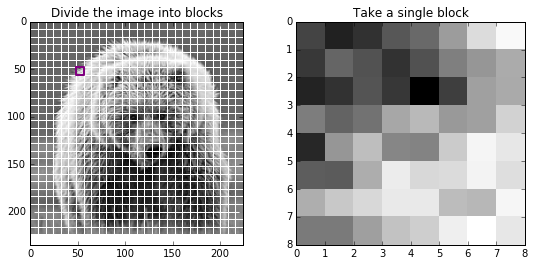

In [47]:
%matplotlib inline

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from skimage import filters, feature
from scipy import signal, misc, ndimage
import pandas as pd
import numpy as np
import os

I = misc.imread(os.path.join('media','bear.png') );
Ig = misc.imread(os.path.join('media','bear.png'), mode='L')
x = np.array(range(np.size(I,0))); y = np.array(range(np.size(I,1)))
X,Y = np.meshgrid(y,x)

# divide in blocks
xb = x[0:-1:8]
yb = y[0:-1:8]

I_threshold100 = filters.rank.threshold(Ig, Ig>=75)
I_threshold200 = filters.rank.threshold(Ig, Ig>=200)

fig=plt.figure(figsize=(9, 4))
ax=plt.subplot(1, 2, 1)
plt.imshow(Ig,cmap='gray')
for ixb in xb:
    plt.plot([ixb, ixb],[y[0],y[-1]],'white')
for iyb in yb:
    plt.plot([x[0], x[-1]],[iyb, iyb],'white')
plt.xlim([0,x[-1]])
plt.ylim([y[-1],0])
plt.plot([xb[6], xb[7], xb[7], xb[6], xb[6]],[yb[6], yb[6], yb[7], yb[7], yb[6]],'purple',linewidth=2)
plt.title('Divide the image into blocks')

ax1=plt.subplot(1, 2, 2)
plt.pcolor(Ig[xb[6]:xb[7],yb[6]:yb[7]],cmap='gray')
plt.xlim([0,8])
plt.ylim([8,0])
plt.title('Take a single block')

b=np.ravel(Ig[xb[6]:xb[7],yb[6]:yb[7]])
print 'we create a vector out of the patch intensities.'
print 'b = ' + str(b)

Now we need to form the dictionary $A$, with all its bases. If it's static, we can take the bases from the DCT. The Image Denoising problem states as follow:

$$
\min_X |AX-B|^2_F + \lambda |X|_1
$$

$B$ contains the patches of the noisy image, and $A$ is the dictionary. If $A$ is static, we can use DCT and solve the problem as a Lasso problem. If we learn the dictionary $A$ from the data, we can also minimize with respect to $A$:

$$
\min_{A,X} |AX-B|^2_F + \lambda |X|_1
$$

As discussed, we will alternate the minimization of $A$ and $X$, by solving Lasso problem and Least Square (with close form solution - of course we can also use the $l_0$ Norm approach) problem alternating the two. Therefore this results in:

$$
AX^*
$$

Where $AX^*$ is the optimal solution and form the Recovery Image.

We introduce the Image Inpainting problem too.  Again, this is the formulation:

$$
\min_X |RAX-B|^2_F + \lambda |X|_1
$$

where $R$ is the degradation matrix or degradation mask. $B$ is the input image with missing pixels. This is a Lasso problem, and solve minimizing $X$, and finding $AX^*$. Here we assume that we exactly know what pixels form the mask. 

Let's see the Image Super-Resolution, with sparse solution and dictionary. Assume we have a pair of images that are LR and HR. In the Training Phase we do:

$$
\min_{A^L,A^H,X}| A^LX-B^L |^2_F + \mu | A^HX-B^H |^2_F + \lambda |X|_1 
$$

The point here is that the sparse rapresentation is the same no matter what dictionary we are using. In the Reconstruction Phase:

$$
X^* = arg\min_X |A^LX-B^{new}|^2_F+ \lambda |X|_1
$$

Here we find the optimal $X^*$, and use the HR to obtain the recovery, thus: $A^HX^*$.

Regarding the Robust Face Recognition, each face is concatenated as columns forming $A$ matrix. The model we use is taking a new image $b$, and pose: $b=Ax+e$. with $x,e$ sparse vectors. We solve this problem like this:

$$
\min_{x,e} (|x|_1 + \lambda |e|_1) \texttt{ subject to } Ax+e=b
$$

To obtain a solution, we introduce $z=[x,\lambda e]$ and $F=[A 1/\lambda I]$. This becomes a standard Matching Pursuit problem. Very often, we want to recognize the face thus $Ax^*$.

In Video Surveillance, we want to separate the background and foreground (moving) frames. 

$$
B=L+E+noise
$$

L, background, is a Low-Rank matrix. E, moving parts, is a sparse matrix. The first step for resolution is approximate $B$ to $L$ to solve the rank issue. 

$$
\min_L |B-L|_F \texttt{ subject to } rank(L) \leq k
$$

I procede with Singular Value Decomposition of $B$. For the separation I do:

$$
\min_{L,E} |B-L-E|^2_F + \lambda |E|_1 \texttt{ subject to } rank(L) \leq k
$$

We'll follow two different directions. 1. Find $L$ using $L=U\Sigma V^T$ and solve:

$$
\min_{L,E} |B-L-E|^2_F + \lambda |E|_1 \texttt{ subject to } |\Sigma|_0 \leq k
$$

Another way to solve it, is using the Nuclear Norm:

$$
\min_{L,E} |B-L-E|^2_F + \lambda |E|_1 + \mu |L|_*
$$

With $|L|_*$ being the Nuclear Norm of $L$.

In the direction 2. We can find $L=AX$, with $A$ being $n$x$k$ and $L$ being $N$x$M$, then:

$$
\min_{A,X,E} |B-AX-E|^2_F + \lambda |E|_1
$$

Let's see Compressive Sensing. We want to do sampling and compression in a single step called Compressive Sampling. We do it by introducing general measurements. In sampling, $A=I$. With Compression, $A$ is not square. We could use random matrices when doing the inner product $A \cdot x$.
